# import library

In [1]:
import pandas as pd
import numpy as np

In [2]:
df1=pd.read_csv('Test.csv')

In [3]:
df1.sample(5)

,text,label
4733,"This was a highly original decent movie, and a...",1
3777,"This is a great movie, it shows what our gover...",1
4890,My goodness. And here I thought that there wer...,0
2468,"Discovering something, the journey is so much ...",1
649,"It was once suggested by Pauline Kael, never a...",1


# data cleaning

In [4]:
df1.shape

(5000, 2)

In [5]:
df2=pd.read_csv('Train.csv')

In [6]:
df2.tail(5)

,text,label
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1
39999,"Why would this film be so good, but only gross...",1


In [7]:
df2.shape

(40000, 2)

In [8]:
df3=pd.read_csv('Valid.csv')

In [9]:
df3.head(5)

,text,label
0,It's been about 14 years since Sharon Stone aw...,0
1,someone needed to make a car payment... this i...,0
2,The Guidelines state that a comment must conta...,0
3,This movie is a muddled mish-mash of clichés f...,0
4,Before Stan Laurel became the smaller half of ...,0


In [10]:
df3.shape

(5000, 2)

In [11]:
5000+40000+5000

50000

In [12]:
data=df1['text']+df2['text']

In [13]:
data.shape

(40000,)

In [14]:
data=pd.concat([df1,df2,df3],ignore_index=True)

In [15]:
data.shape

(50000, 2)

In [16]:
data.head()

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


In [17]:
data.isnull().sum()

text     0
label    0
dtype: int64

In [18]:
col=data.columns
for i in col:
    print(data[col].duplicated().sum())
    print('\n')
    print(data[data[col].duplicated()])

418


                                                    text  label
3887   I watched this movie when Joe Bob Briggs hoste...      0
3959   Oh God,what an idiotic movie!Incredibly cheap ...      0
4432   .......Playing Kaddiddlehopper, Col San Fernan...      1
4761   This movie starts off somewhat slowly and gets...      1
4802   What can I say? An excellent end to an excelle...      1
...                                                  ...    ...
49886  This movie purports to be a character study of...      0
49898  Ed Wood rides again. The fact that this movie ...      0
49914  Bette Midler is again Divine! Raunchily humoro...      1
49959  No spoilers here but I have been a fan since W...      0
49970  This movie surprised me. Some things were "cli...      1

[418 rows x 2 columns]
418


                                                    text  label
3887   I watched this movie when Joe Bob Briggs hoste...      0
3959   Oh God,what an idiotic movie!Incredibly cheap ...      0
4432

In [19]:
data=data.drop_duplicates()

In [20]:
data.shape

(49582, 2)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49582 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    49582 non-null  object
 1   label   49582 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [22]:
data.describe(include=object)

,text
count,49582
unique,49582
top,I always wrote this series off as being a comp...
freq,1


In [23]:
data['label'].value_counts()

1    24884
0    24698
Name: label, dtype: int64

# EDA

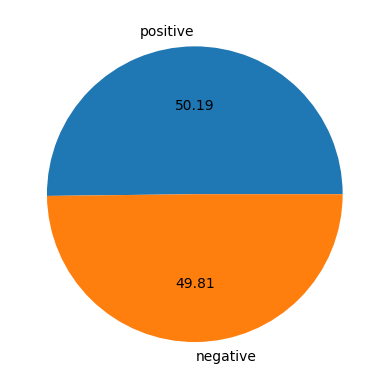

In [24]:
import matplotlib.pyplot as plt
plt.pie(data['label'].value_counts(),labels=['positive','negative'],autopct="%0.2f")
plt.show()

In [25]:
data['num_char']=data['text'].apply(len)

In [26]:
data

,text,label,num_char
0,I always wrote this series off as being a comp...,0,2105
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0,1070
2,This movie was so poorly written and directed ...,0,1402
3,The most interesting thing about Miryang (Secr...,1,4277
4,"when i first read about ""berlin am meer"" i did...",0,1013
...,...,...,...
49995,"Man, I loved this movie! This really takes me ...",1,645
49996,Recovery is an incredibly moving piece of work...,1,1623
49997,"You can take the crook out of the joint, but i...",1,650
49998,FUTZ is the only show preserved from the exper...,1,1426


In [27]:
# data.drop(['char_len'],axis=1, inplace=True)

# Feature engineering

In [28]:
import nltk

In [29]:
data['num_word']=data['text'].apply(lambda x: len(nltk.wordpunct_tokenize(x)))

In [30]:
data.sample(5)

,text,label,num_char,num_word
4046,I was pleasantly surprised to find that How to...,1,992,194
30551,I cannot understand why so many people did not...,1,620,129
41438,I want to add to the praise for the production...,1,328,62
8299,There's a thin line between being theatrical a...,0,656,158
573,The End of Suburbia is an important documentar...,1,1023,205


In [31]:
data['num_sentance']=data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [32]:
data.head(5)

,text,label,num_char,num_word,num_sentance
0,I always wrote this series off as being a comp...,0,2105,441,21
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0,1070,235,9
2,This movie was so poorly written and directed ...,0,1402,307,9
3,The most interesting thing about Miryang (Secr...,1,4277,927,37
4,"when i first read about ""berlin am meer"" i did...",0,1013,218,9


In [33]:
data[data['label']==1][['num_word','num_char','num_sentance']].describe()

,num_word,num_char,num_sentance
count,24884.000000,24884.000000,24884.000000
mean,281.988788,1326.278532,10.444302
std,215.273385,1032.597204,7.725596
min,11.000000,65.000000,1.000000
25%,150.000000,692.000000,6.000000
50%,208.000000,969.000000,9.000000
75%,344.000000,1615.250000,13.000000
max,2850.000000,13704.000000,282.000000


In [34]:
data[data['label']==0][['num_word','num_char','num_sentance']].describe()

,num_word,num_char,num_sentance
count,24698.000000,24698.000000,24698.000000
mean,280.156693,1294.739615,11.023646
std,201.971235,946.501793,7.883809
min,8.000000,32.000000,1.000000
25%,155.000000,706.000000,6.000000
50%,212.000000,974.000000,9.000000
75%,339.000000,1568.000000,13.000000
max,1911.000000,8969.000000,118.000000


In [35]:
!pip install emoji


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
import emoji

In [37]:
# emoji.emojize('i am happy')
emoji.demojize('i am happy 🥰')

'i am happy :smiling_face_with_hearts:'

In [38]:
import seaborn as sns

<AxesSubplot: xlabel='num_word', ylabel='Count'>

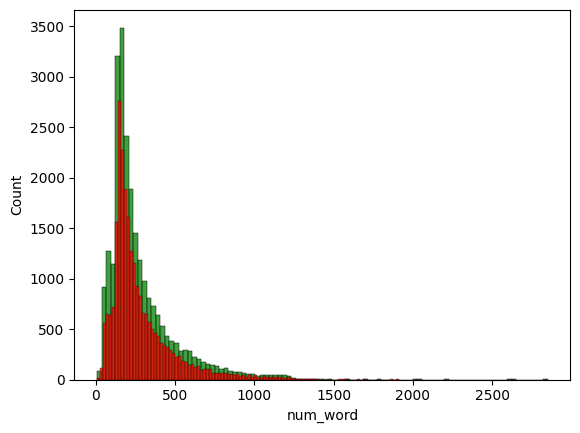

In [39]:
sns.histplot(data[data['label']==1]['num_word'],bins=100,color='green')
sns.histplot(data[data['label']==0]['num_word'],bins=100, color='red')

<AxesSubplot: xlabel='num_char', ylabel='Count'>

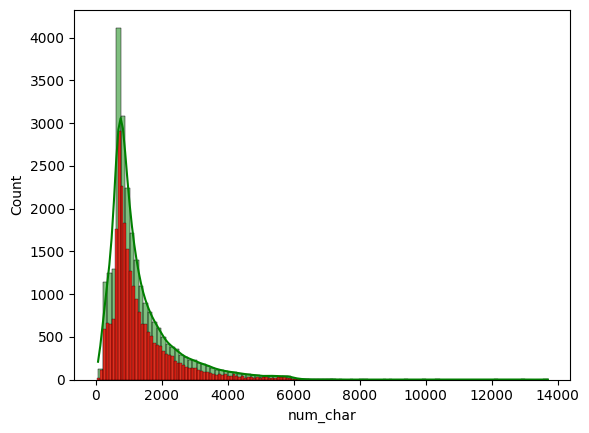

In [40]:
sns.histplot(data[data['label']==1]['num_char'],bins=100,color='green',kde=True)
sns.histplot(data[data['label']==0]['num_char'],bins=100,color='red')

<AxesSubplot: xlabel='num_sentance', ylabel='Count'>

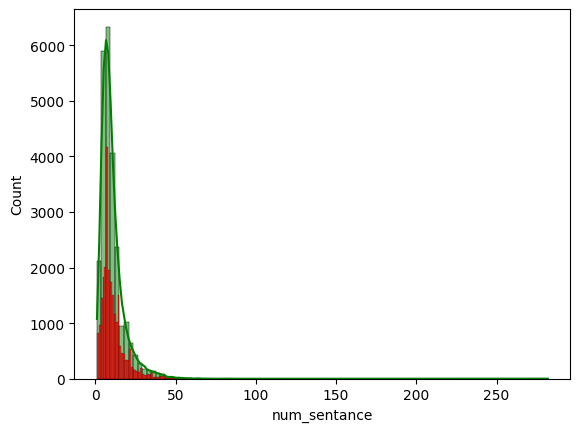

In [41]:
sns.histplot(data[data['label']==1]['num_sentance'],bins=100,color='green' ,kde=True)
sns.histplot(data[data['label']==0]['num_sentance'],bins=100,color='red')

C:\Users\srbhk\AppData\Local\Temp\ipykernel_9700\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<AxesSubplot: >

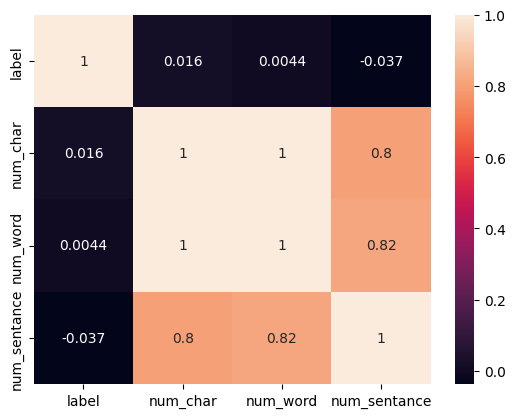

In [42]:
sns.heatmap(data.corr(),annot=True)

In [43]:
from nltk.corpus import stopwords

In [44]:
import string

In [45]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [46]:
data.head(5)

,text,label,num_char,num_word,num_sentance
0,I always wrote this series off as being a comp...,0,2105,441,21
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0,1070,235,9
2,This movie was so poorly written and directed ...,0,1402,307,9
3,The most interesting thing about Miryang (Secr...,1,4277,927,37
4,"when i first read about ""berlin am meer"" i did...",0,1013,218,9


In [47]:
def operation_on_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum:
            y.append(i)
    p=y[:]
    y.clear()
    
    for i in p:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    p=y[:]
    y.clear()
    for i in p:
        y.append(ps.stem(i))
        
    return " ".join(y)
            

In [48]:
# data['transform_text']=data['text'].apply(lambda x: operation_on_text(x))

In [49]:
# data.head(10)

In [50]:
!pip install textblob


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
from textblob import TextBlob

In [52]:
data['sentiment']=data['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [53]:
data.head(10)

,text,label,num_char,num_word,num_sentance,sentiment
0,I always wrote this series off as being a comp...,0,2105,441,21,0.147681
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0,1070,235,9,0.028373
2,This movie was so poorly written and directed ...,0,1402,307,9,-0.117849
3,The most interesting thing about Miryang (Secr...,1,4277,927,37,0.018818
4,"when i first read about ""berlin am meer"" i did...",0,1013,218,9,0.001808
5,"I saw this film on September 1st, 2005 in Indi...",1,1887,399,12,0.177010
6,I saw a screening of this movie last night. I ...,0,1470,311,21,0.026427
7,William Hurt may not be an American matinee id...,1,955,186,6,0.104722
8,IT IS A PIECE OF CRAP! not funny at all. durin...,0,1092,293,21,-0.268333
9,I'M BOUT IT(1997)<br /><br />Developed & publi...,0,893,214,4,0.005833


In [54]:
def senti(num):
    if num>0:
        return 'positive'
    elif num==0:
        return 'neutral'
    elif num<0:
        return 'negative'

In [55]:
data['sentiment']=data['sentiment'].apply(lambda x: senti(x))

In [56]:
data.head(10)

,text,label,num_char,num_word,num_sentance,sentiment
0,I always wrote this series off as being a comp...,0,2105,441,21,positive
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0,1070,235,9,positive
2,This movie was so poorly written and directed ...,0,1402,307,9,negative
3,The most interesting thing about Miryang (Secr...,1,4277,927,37,positive
4,"when i first read about ""berlin am meer"" i did...",0,1013,218,9,positive
5,"I saw this film on September 1st, 2005 in Indi...",1,1887,399,12,positive
6,I saw a screening of this movie last night. I ...,0,1470,311,21,positive
7,William Hurt may not be an American matinee id...,1,955,186,6,positive
8,IT IS A PIECE OF CRAP! not funny at all. durin...,0,1092,293,21,negative
9,I'M BOUT IT(1997)<br /><br />Developed & publi...,0,893,214,4,positive


In [57]:
data['sentiment'].value_counts()

positive    37649
negative    11902
neutral        31
Name: sentiment, dtype: int64

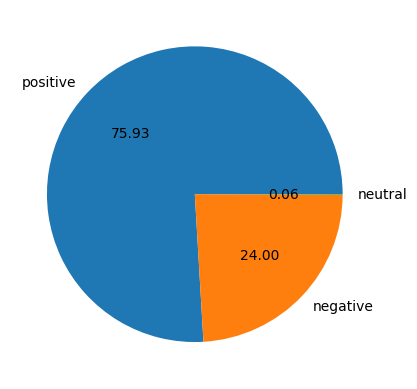

In [58]:
plt.pie(data['sentiment'].value_counts(),labels=['positive','negative','neutral'],autopct="%0.2f")
plt.show()

In [59]:
!pip install SentimentIntensityAnalyzer
!pip install nltk


ERROR: Could not find a version that satisfies the requirement SentimentIntensityAnalyzer (from versions: none)
ERROR: No matching distribution found for SentimentIntensityAnalyzer

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\srbhk\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [61]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
# sia.polarity_scores('happy is today baby love u')
data['sentiment1']=data['text'].apply(lambda x: sia.polarity_scores(x))

C:\Python310\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [62]:
def sentiment_score1(text):
    if text['compound']==0:
        return "neutral"
    elif text['compound']>0:
        return "positive"
    elif text['compound']<0:
        return "negative"

In [63]:
data['sentiment1']=data['sentiment1'].apply(lambda x:sentiment_score1(x))

In [64]:
data['sentiment1'].head(5)

0    positive
1    negative
2    negative
3    negative
4    negative
Name: sentiment1, dtype: object

([<matplotlib.patches.Wedge at 0x1a4ffab3640>,
 [Text(-0.5360796431318882, 0.960530382767556, ''),
  Text(0.5342528896199368, -0.9615476326905225, ''),
  Text(1.0999980128821596, -0.0020908503773422005, '')])

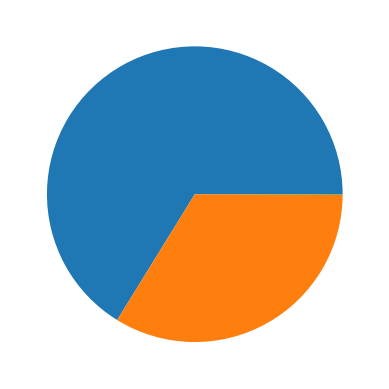

In [67]:
plt.pie(data['sentiment1'].value_counts(),labels=['positive','negative','neutral'],autopct="%0.2f")
plt.show

# #start model building

In [ ]:
y=data['label']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv=CountVectorizer()

In [ ]:
x=cv.fit_transform(data['text']).toarray()

In [ ]:
print(x)

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=40)

In [ ]:
from sklearn.svm import SVC
sv=SVC()

In [ ]:
sv.fit(x_train,y_train)

In [ ]:
sv.predict(x_test,y_test)
#erro in sparse matrix
#reach memory size
#bag of word

# #this code help to find the sentiment score of any text

In [ ]:
from textblob import TextBlob

In [ ]:
text=TextBlob('Performance, thermals and display is very good and attractive point. But battery is very bad. Also there is no 60 hz option in display settings but you may add one using CRU.According to me it is a value for money if you do not spend most of the time on battery. Thanks for reading')

In [ ]:
print(text.sentiment.polarity)

In [ ]:
print(text.sentiment.subjectivity)